# Continuous Optimization Problem

The following tutorial has the intention to get a first idea how to define a continuous (spatial) problem and to get an idea how optimization algorithms work to solve the particular problem.

#Most important terms

##Problem
"An Optimization Problem (OP) is a pair of objects (𝑆, 𝑓 ) where 𝑆 is the set of all possible solutions and 𝑓 : 𝑆 → 𝐼𝑅 is the fitness function" (Leonardo Vanneschi, 2018).

An optimization problem is defined as the minimization or maximization of one or several objective functions that can be subject to none, one or several constraints being used to validate the feasibility of solutions (Chiandussi et al, 2012).

##Decision variable(s)
A variable that is under the control of the decision for the modelled problem.

##Solution
Every solution to a problem is one configuration of the problem’s decision variable which represents the decision of the problem to be made.

##Objective(s)
Represents what should be maximized or minimized.

##Objective function(s)
The function to compute the objective value.

##Constraint(s)
Reflect the values the decision variables can take, or are used to avoid undesirable or infeasible solutions.

#Problem: Finding the peak of a mountain

Your problem to solve seems straight forward: You are a hiker and start at the parking lot at the bottom of the mountain.

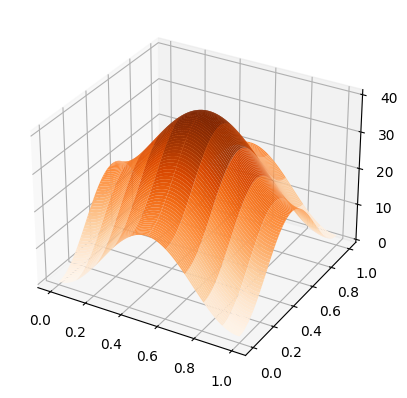

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D 
 
X = np.linspace(0, 1, 100)     
Y = np.linspace(0, 1, 100)     
X, Y = np.meshgrid(X, Y) 

#here, we use the rastrigin function to simulate the mountain
Z = (X**2 - 10 * np.cos(2 * np.pi * X)) + \
  (Y**2 - 10 * np.cos(2 * np.pi * Y)) + 20

fig = plt.figure() 
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=10,
  cmap=cm.Oranges, linewidth=0.08,
  antialiased=True)    

plt.show()

In [33]:
#for the position on the mountain with the height we create a class Point
class Point:
  def __init__(self, x,y):
        self.x = x
        self.y = y
        #get the corresponding height from the rastrigin function
        self.z = (self.x**2 - 10 * np.cos(2 * np.pi * self.x)) + (self.y**2 - 10 * np.cos(2 * np.pi * self.y)) + 20
      

In [34]:
#plot function for the 'mountain'
def plot_mountain(fig,X,Y):
  #ax = fig.gca(projection='3d')
  ax = fig.add_subplot(projection='3d')
  ax.plot_surface(X, Y, Z, rstride=1, cstride=10,
    cmap=cm.Oranges, linewidth=0.08, alpha=0.4, 
    antialiased=True)
  return ax

#plot function for the position of the hiker
def plot_position(ax, p, z_offset=2, color='b', size = 40):
  # set an offset for point to make sure it is visible
  ax.scatter(p.x, p.y, p.z + z_offset, marker='o', s=size, c= color, edgecolors='black',linewidths=0.2)
  return ax

**Student task**
Define a starting point at position x = 1, y = 0

1.0


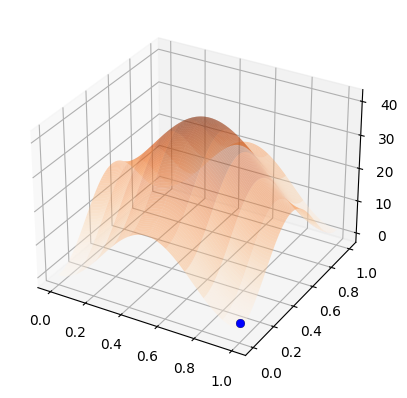

In [35]:
#define a starting point for the hike

p_start = Point(x=1, y=0)
print(p_start.z)

#set up an empty plot
fig = plt.figure()
# produce the maintain plot
ax = plot_mountain(fig,X,Y)
#produce the hike position plot
plot_position(ax, p_start)
#show the plots
plt.show()

#Problem definition
Now, we have a landscape and a starting point of the hike. However, we still need to formulate the problem. Furthermore, the solution needs to be defined and the objective function to quantify the quality of the solution.

In [36]:
class Solution: 
    _id = 0
    
    def __init__(self, representation):
        self._solution_id = Solution._id
        Solution._id += 1
        self.representation = representation

    def verbose(self, print_representation=True):       
        print("Solution ID: %d\nFitness: %.2f\nIs admissible?\tR: %s" %
              (self._solution_id, self.fitness, self.valid))

In [37]:
# The following snippet of code is an example for a very generic problem
class Problem:
    def __init__(self, search_space, objective_function, minimization):
        self.search_space = search_space        
        self.objective_function = objective_function
        self.minimization = minimization
      
    def validate(self, solution):
      pass
    def evaluate(self, solution):
      pass

**Student task**
Create a validation function which ensures that a solution is located within the search space!

In [38]:
# Now, we use the same class structure to define our own hiking problem
class ContinuousProblem(Problem):
  
    def __init__(self, search_space, objective_function, minimization=False):
        Problem.__init__(self, search_space, objective_function, minimization)

    def evaluate(self, solution):
        point = solution.representation

        # The validation process determines whether a solution is a feasible solution to the problem. 
        # For this specific hiking problem, we want to ensure that the position always lies within the mountain area.
        solution.valid = self.validate(point)

        if solution.valid:
            solution.fitness = self.objective_function(point)
        else:
            if self.minimization:
                solution.fitness = np.iinfo(np.int32).max
            else:
                solution.fitness = 0

    def validate(self, point):
      validity=True
      # check whether the x position is within the defined mountain region
      if point.x < self.search_space[0][0] or point.x > self.search_space[0][1]:
        validity=False
      # check whether the y position is within the defined mountain region
      if point.y < self.search_space[1][0] or point.y > self.search_space[1][1]:
        validity=False
      return validity

**Student task**
Define the objective function that return the objective value

In [39]:
# The objective function to retrieve the objective value of solutions is still missing.
def get_height(point):
  return point.z

In [40]:
#let's create the problem instance!
mountain_boundary=[[0,1],[0,1]]
hiking_problem = ContinuousProblem(search_space=mountain_boundary, objective_function = get_height)



---


*Question: What might be the search space in a real world example?*

---



Now, we can test our problem with an example point. 

**Student task**
Create and evaluate an exemplary solution called *test_solution* with a position at  x = 0.3 and y = 0.6, and print out the solution with its ID, fitness value and the info whether its valid or not

Solution ID: 0
Fitness: 31.63
Is admissible?	R: True


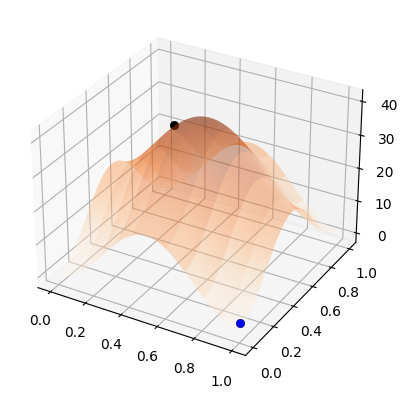

In [41]:
#evaluate an exemplary solution with a position at  x = 0.3 and y = 0.6

test_solution = Solution(representation =  Point(x=0.3,y=0.6))
hiking_problem.evaluate(test_solution)
test_solution.verbose()

#set up an empty plot
fig = plt.figure()
# produce the mountain plot
ax = plot_mountain(fig,X,Y)
#produce the hike position plot
ax = plot_position(ax, p_start)
ax = plot_position(ax, test_solution.representation, color = 'black' )
#show the plots
plt.show()

Comparable to the general Problem class, we define a Search Algorithm class. 
Many different search algorithm exist, and you will learn about a subset of them.

In [42]:
class SearchAlgorithm:
    def __init__(self, problem_instance):
        self.problem_instance = problem_instance
 
    def initialize(self):
        pass
    
    def search(self, n_iterations, report=False):
        pass

    def get_best(self, candidate_a, candidate_b):
        if self.problem_instance.minimization:
            if candidate_a.fitness >= candidate_b.fitness:
                return candidate_b
            else:
                return candidate_a
        else:
            if candidate_a.fitness <= candidate_b.fitness:
                return candidate_b
            else:
                return candidate_a
    
    # Here, we define reporting functions. They are not a requirement, but convenient.  
    def verbose_reporter(self):
        print("Best solution found:")
        self.best_solution.verbose()

    def verbose_reporter_inner(self, solution, iteration):
        print("> > > Current best solution at iteration %d:" % iteration)
        solution.verbose()



The first algorithm you will learn about is the random search. 
All heuristic search functions contain elements of randomness. In general, the more advanced search algorithms have the goal of outperforming the random search. However, it is a good starting point to learn how a search algorithm works.

In [43]:
def random_neighbor_position(random_state, current_position, max_stepsize):
    
    def positive_or_negative():
      if random_state.random() < 0.5:
          return 1
      else:
          return -1
    
    current_x = current_position.x
    current_y = current_position.y
    random_neighbor_x = current_x + (positive_or_negative() * (random_state.random() * max_stepsize))
    random_neighbor_y = current_y + (positive_or_negative() * (random_state.random() * max_stepsize))
    return Point(random_neighbor_x, random_neighbor_y)

class RandomSearch(SearchAlgorithm):
  def __init__(self, problem_instance, random_state, initial_solution, 
               neighborhood_function = random_neighbor_position, 
               max_stepsize = 0.01):
        SearchAlgorithm.__init__(self, problem_instance)
        self.random_state = random_state
        self.best_solution = initial_solution
        self.neighborhood_function = neighborhood_function
        self.max_stepsize = max_stepsize
        self.problem_instance.evaluate(self.best_solution)
      
  def search(self, n_iterations, report=False):
    all_solutions = []
    i = self.best_solution

    for iteration in range(n_iterations):
      j = self.generate_new_position(i.representation)
      i = self.get_best(i, j)
      all_solutions.append(i)

      if report:
        self.verbose_reporter_inner(i, iteration)

    self.best_solution=i

    return all_solutions

  def generate_new_position(self, current_position):
    random_new_position = self.neighborhood_function(self.random_state, current_position = current_position, 
                                                     max_stepsize = self.max_stepsize)
    random_new_solution = Solution(random_new_position)
    self.problem_instance.evaluate(random_new_solution)
    return random_new_solution

# Random state
In the next step, we define a pseudo random state.

---


*Poll question: What might be the reason to generate a random state with a pseudo-random state generator?*

---

In [44]:
# creates pseudo random numbers generator 
def get_random_state(seed):
    return np.random.RandomState(seed)
# setup random state
seed=1
random_state = get_random_state(seed)

Now, we can create a RandomSearch instance and start the search for optimal solutions

**Student task**
Create an instance of the class RandomSearch and name it *rs*

In [45]:
# perform Random Search
start_solution = Solution(p_start)
hiking_problem.evaluate(start_solution)

###
rs = RandomSearch(problem_instance=hiking_problem, random_state=random_state, initial_solution=start_solution)
###

random_search_solutions = rs.search(n_iterations=400, report=False)
rs.verbose_reporter()

Best solution found:
Solution ID: 380
Fitness: 40.50
Is admissible?	R: True


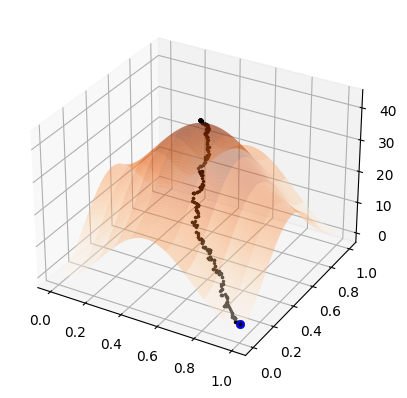

In [46]:
#set up an empty plot
fig = plt.figure()
# produce the mountain plot
ax = plot_mountain(fig,X,Y)
#produce the hike position plot
ax = plot_position(ax, p_start)
for i in range(len(random_search_solutions)):
  ax = plot_position(ax, random_search_solutions[i].representation, color = 'black', size = 5 )
#show the plots
plt.show()

**Student task**
Run the same search with another random state and compare the results.

# Simulated Annealing


In [47]:
import math

class Annealing(RandomSearch):
  def __init__(self, problem_instance, random_state, initial_solution,
               neighborhood_function = random_neighbor_position, 
               max_stepsize = 0.01, initial_temperature = 1, alpha = 0.01):
    RandomSearch.__init__(self, problem_instance, random_state,initial_solution,
                          neighborhood_function, max_stepsize)
    self.initial_temperature = initial_temperature
    self.alpha = alpha
    
  def search(self, n_iterations, report=False):
    #this is the equivalent to the temperature parameter of simulated annealing
    all_solutions = []
    current_temperature=self.initial_temperature

    i = self.best_solution
    

    for iteration in range(n_iterations):
      j = self.generate_new_position(i.representation)
      i = self.get_p_best(i, j, current_temperature)
      all_solutions.append(i)

      if report:
        self.verbose_reporter_inner(i, iteration)
      
      if current_temperature>=0.01:
          #Change this to something non Lienar
        #current_temperature -= self.alpha
        #current_temperature = self.temp_reduction(mode="linear", temperature=current_temperature, alpha=self.alpha)
        current_temperature = self.temp_reduction(mode="quadratic", temperature=current_temperature, alpha=self.alpha)

    self.best_solution=i

    return all_solutions
  #Possible Solution for the first task?
  def temp_reduction(self, mode, temperature, alpha):
      if mode == "linear":
          return temperature - alpha
      if mode == "quadratic":
          return temperature - pow(alpha, 2)

  def get_p_best(self, candidate_a, candidate_b, actual_c):
    p=0
    if candidate_b.valid:
      if self.problem_instance.minimization:
        # if the new solution is better we accept it
        if candidate_b.fitness <= candidate_a.fitness:
          solution = candidate_b
        #if the new solution is worse we accept it with a certain probability
        elif self.random_state.uniform(0, 1) < (math.exp((candidate_b.fitness - candidate_a.fitness)) / actual_c):
          solution = candidate_b
        else:
          solution = candidate_a
      else:
          # if the new solution is better we accept it
        if candidate_b.fitness >= candidate_a.fitness:
          solution = candidate_b
        #if the new solution is worse we accept it with a certain probability
        elif self.random_state.uniform(0, 1) < (math.exp((candidate_b.fitness - candidate_a.fitness)) / actual_c):
          solution = candidate_b
        else:
          solution = candidate_a
    else:
      solution = candidate_a
    
    return solution
      
  def generate_new_position(self, current_position):
    random_new_position = self.neighborhood_function(self.random_state, current_position = current_position, 
                                                     max_stepsize = self.max_stepsize)
    random_new_solution = Solution(random_new_position)
    self.problem_instance.evaluate(random_new_solution)
    return random_new_solution

In [48]:
random_state = get_random_state(20)

sa = Annealing(problem_instance = hiking_problem, random_state = random_state,
               initial_solution = start_solution, initial_temperature = 50)

simulated_annealing_solutions = sa.search(n_iterations=400, report=False)
sa.verbose_reporter()

Best solution found:
Solution ID: 790
Fitness: 40.50
Is admissible?	R: True


#Benchmark

Let's compare the traces of the two algorithms:

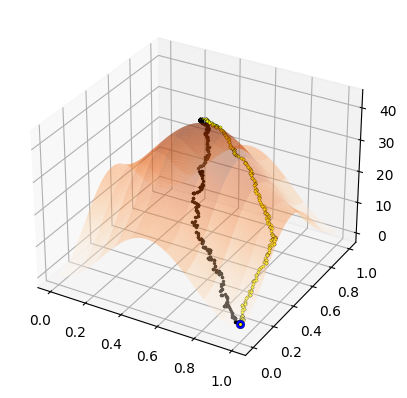

In [49]:
#set up an empty plot
fig = plt.figure()
# produce the maintain plot
ax = plot_mountain(fig,X,Y)
#produce the hike position plot
ax = plot_position(ax, p_start)
for i in range(len(random_search_solutions)):
  ax = plot_position(ax, random_search_solutions[i].representation, color = 'black', size = 5 )
for i in range(len(random_search_solutions)):
  ax = plot_position(ax, simulated_annealing_solutions[i].representation, color = 'yellow', size = 5 )
#show the plots
plt.show()

Fine, but what if we make the problem more difficult?

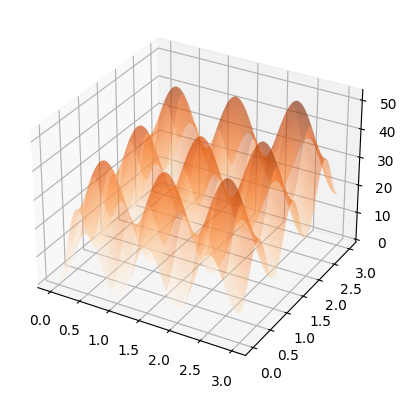

In [50]:
X = np.linspace(0, 3, 100)     
Y = np.linspace(0, 3, 100)     
X, Y = np.meshgrid(X, Y) 

mountain_boundary=[[0,3],[0,3]]
complex_hiking_problem = ContinuousProblem(search_space=mountain_boundary, objective_function = get_height)

#here, we use the rastrigin function to simulate the mountain
Z = (X**2 - 10 * np.cos(2 * np.pi * X)) + \
  (Y**2 - 10 * np.cos(2 * np.pi * Y)) + 20
fig = plt.figure()
# produce the maintain plot
ax = plot_mountain(fig,X,Y)
plt.show()

In [51]:
# perform Random Search
start_solution = Solution(p_start)
complex_hiking_problem.evaluate(start_solution)

rs = RandomSearch(complex_hiking_problem, random_state, max_stepsize= 0.75 ,initial_solution = Solution(p_start))

random_search_solutions = rs.search(n_iterations=2000, report=False)
rs.verbose_reporter()

Best solution found:
Solution ID: 2546
Fitness: 40.49
Is admissible?	R: True


In [52]:
sa = Annealing(problem_instance = complex_hiking_problem,max_stepsize= 0.75 , random_state = random_state,
               initial_solution = start_solution, initial_temperature = 100, alpha = 0.2)
#problem_instance, random_state, initial_solution

simulated_annealing_solutions = sa.search(n_iterations=2000, report=False)
sa.verbose_reporter()

Best solution found:
Solution ID: 4360
Fitness: 42.47
Is admissible?	R: True


Let's see how the traces from the two algorithms look like this time:

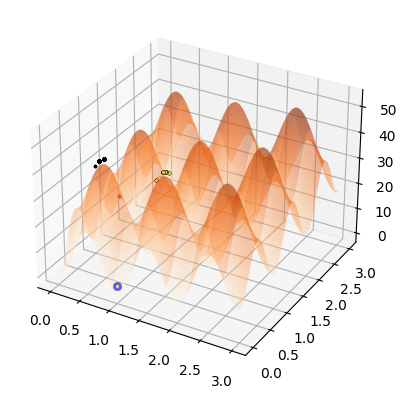

In [53]:
#set up an empty plot
fig = plt.figure()
# produce the maintain plot
ax = plot_mountain(fig,X,Y)
#produce the hike position plot
ax = plot_position(ax, p_start)
for i in range(len(random_search_solutions)):
  ax = plot_position(ax, random_search_solutions[i].representation, color = 'black', size = 5 )
for i in range(len(random_search_solutions)):
  ax = plot_position(ax, simulated_annealing_solutions[i].representation, color = 'yellow', size = 5 )
#show the plots
plt.show()

**Student task**
1. Change the linear temperarure reduction to a non-linear one (current_temperature -= self.alpha is currently being used)
2. Try to find the best parameters for the Simulated Annealing (Initital temperature, alpha, max_stepsize in the search function, and the temperature reduction function)
